In [1]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch
import seaborn as sns

import data
import pt_linreg
import fcann2
import pt_logreg
import pt_deep
import ksvm_wrap

sns.set_theme()
sns.set_style("whitegrid")
np.random.seed(100)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 2. Višeslojna klasifikacija u Pythonu (20% bodova)
---
Implementiran je dvoslojni model koji klasicifira 2D podatke. Kao aktivacijska funkcija skrivenog sloja je korištena zglobnica, odnosno ReLu dok se finalni logiti propuštaju kroz softmax kako bismo dobili probibalističku interpretaciju.

In [ ]:
# TODO kod kada se poprave gradijenti

## 3. Linearna regresija u PyTorchu (10% bodova)
---
Kako bih demonstrirala rad ovog zadatka, implementirala sam dodatnu funkciju u modulu data.py koja generira regresijski pravac s nadodanim šumom. Funkcija se zove sample lr data i prima 3 argumenta: veličinu uzorka, koeficijent nagiba pravca i vrijednost varijance/šuma.

Dani primjerak koda u Pytorchu sam izmijenila na način da sam uvela funkciju MSE koja usrednjeni kvadratni gubitak. Na taj način je sam kod za lineranu regresiju neovisan o veličini ulaznih podataka (X i Y).

Nadalje, dodala sam i ručno računanje gradijenata za koeficijente a i b:
$\nabla_a = 2(Y_{gt} - Y_{pred}) \times X$ i $\nabla_b = 2(Y_{gt} - Y_{pred})$

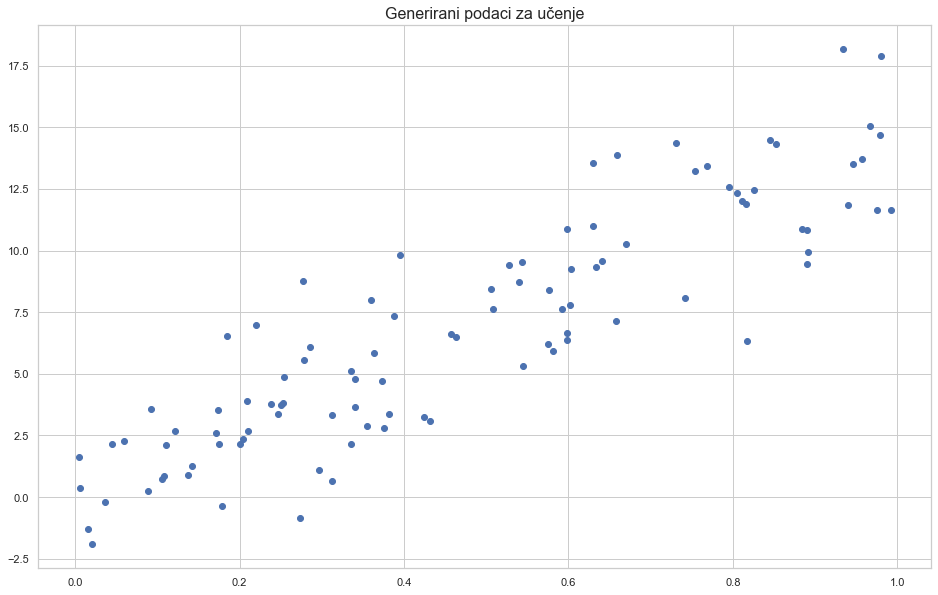

In [2]:
X, Y_ = data.sample_lr_data(100, 15, 2)
fig = plt.figure(figsize=(16, 10))
plt.scatter(X, Y_)
plt.title("Generirani podaci za učenje", fontsize=16)
plt.show()

In [3]:
X_t, Y_t = torch.Tensor(X), torch.Tensor(Y_)
a, b = pt_linreg.linear_regression(X_t, Y_t, 1000, 0.1)
Y = a*X_t + b
Y = Y.detach().numpy()


step: 0, loss:63.995750427246094, a:tensor([0.7233], requires_grad=True), b tensor([1.6971], requires_grad=True)
	step: 0, my a grad: -8.531964302062988, my b grad: -12.89840316772461
	step: 0, pytorch a : -8.531965255737305, pytorch b: -12.89840316772461

step: 10, loss:13.74923324584961, a:tensor([4.1845], requires_grad=True), b tensor([4.8667], requires_grad=True)
	step: 10, my a grad: -1.7902685403823853, my b grad: -0.09093530476093292
	step: 10, pytorch a : -1.7902686595916748, pytorch b: -0.09093528985977173

step: 20, loss:11.455657005310059, a:tensor([5.5885], requires_grad=True), b tensor([4.4407], requires_grad=True)
	step: 20, my a grad: -1.2349343299865723, my b grad: 0.5677520632743835
	step: 20, pytorch a : -1.2349343299865723, pytorch b: 0.5677518844604492

step: 30, loss:9.828859329223633, a:tensor([6.7204], requires_grad=True), b tensor([3.8839], requires_grad=True)
	step: 30, my a grad: -1.058992862701416, my b grad: 0.5330937504768372
	step: 30, pytorch a : -1.0589

	step: 410, my a grad: -0.006042232736945152, my b grad: 0.0030605411157011986
	step: 410, pytorch a : -0.006042219698429108, pytorch b: 0.003060564398765564

step: 420, loss:4.622980117797852, a:tensor([14.4108], requires_grad=True), b tensor([-0.0108], requires_grad=True)
	step: 420, my a grad: -0.00527438148856163, my b grad: 0.0026716231368482113
	step: 420, pytorch a : -0.005274355411529541, pytorch b: 0.0026715993881225586

step: 430, loss:4.622949600219727, a:tensor([14.4157], requires_grad=True), b tensor([-0.0132], requires_grad=True)
	step: 430, my a grad: -0.004603481385856867, my b grad: 0.00233257282525301
	step: 430, pytorch a : -0.004603534936904907, pytorch b: 0.0023326128721237183

step: 440, loss:4.622926235198975, a:tensor([14.4199], requires_grad=True), b tensor([-0.0154], requires_grad=True)
	step: 440, my a grad: -0.004019269719719887, my b grad: 0.0020350550767034292
	step: 440, pytorch a : -0.00401933491230011, pytorch b: 0.0020350217819213867

step: 450, loss:4

	step: 830, my a grad: -2.1409989130916074e-05, my b grad: 9.14573683985509e-06
	step: 830, pytorch a : -2.1405518054962158e-05, pytorch b: 9.208917617797852e-06

step: 840, loss:4.6228508949279785, a:tensor([14.4492], requires_grad=True), b tensor([-0.0302], requires_grad=True)
	step: 840, my a grad: -1.8062592062051408e-05, my b grad: 9.050369044416584e-06
	step: 840, pytorch a : -1.8052756786346436e-05, pytorch b: 9.074807167053223e-06

step: 850, loss:4.6228508949279785, a:tensor([14.4492], requires_grad=True), b tensor([-0.0302], requires_grad=True)
	step: 850, my a grad: -1.5125274330785032e-05, my b grad: 8.859634363034274e-06
	step: 850, pytorch a : -1.5132129192352295e-05, pytorch b: 8.806586265563965e-06

step: 860, loss:4.6228508949279785, a:tensor([14.4492], requires_grad=True), b tensor([-0.0302], requires_grad=True)
	step: 860, my a grad: -1.374244675389491e-05, my b grad: 6.647109785262728e-06
	step: 860, pytorch a : -1.3709068298339844e-05, pytorch b: 6.660819053649902e

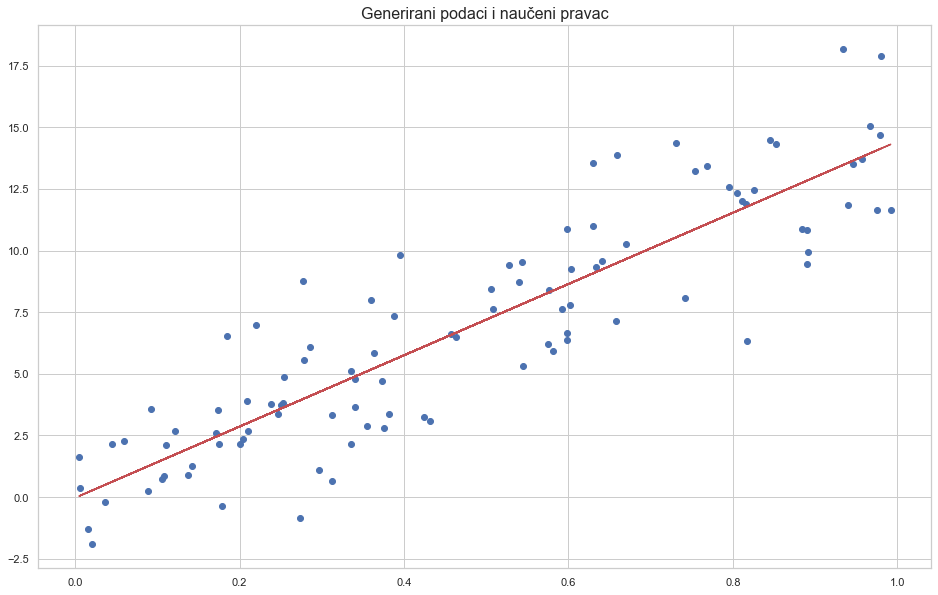

In [4]:
figure = plt.figure(figsize=(16, 10))
plt.scatter(X, Y_)
plt.plot(X, Y, "r-")
plt.title("Generirani podaci i naučeni pravac", fontsize=16)
plt.show()

## 4. Logistička regresija u PyTorchu (20% bodova)
---
Ovaj zadatak je nadogradnja nulte laboratorijske vježbe u kojoj smo ručno implementirali logističku regresiju. Uz korištenje biblioteke PyTorch, implementacija problema logističke regresije se uvelike pojednostavljuje. 

In [5]:
# instanciraj podatke X i labele Yoh_
np.random.seed(100)
x, Y_ = data.sample_gauss_2d(3, 100)
Yoh = data.class_to_onehot(Y_)
X = torch.Tensor(x)
Yoh_ = torch.Tensor(Yoh)
# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
pt_logreg.train(ptlr, X, Yoh_, 1000, 0.1, 1e-1, 250)

# dohvati vjerojatnosti na skupu za učenje
probs = pt_logreg.eval(ptlr, X)
Y = np.argmax(probs, axis=1)

Epoch 0/1000, loss = 5.094479560852051
Epoch 250/1000, loss = 0.45081353187561035
Epoch 500/1000, loss = 0.4004831612110138
Epoch 750/1000, loss = 0.37580227851867676


Accuracy: 0.97, precision and recall: [(0.95, 0.9595959595959596), (0.96, 0.9795918367346939), (1.0, 0.970873786407767)]


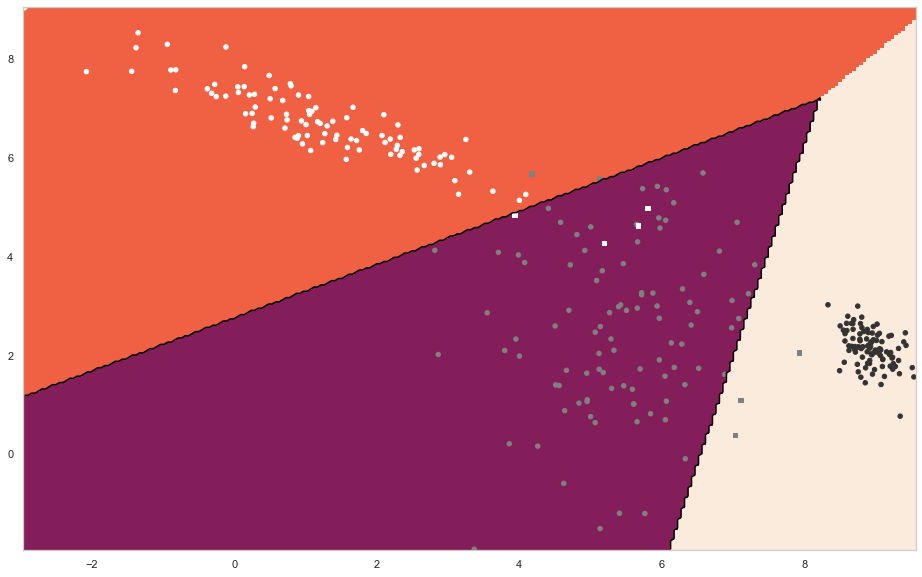

In [6]:
# ispiši performansu (preciznost i odziv po razredima)
accuracy, precision, recall = data.eval_perf_multi(Y, Y_)
print("Accuracy: {}, precision and recall: {}".format(accuracy, precision))

# iscrtaj rezultate, decizijsku plohu
figure = plt.figure(figsize=(16, 10))
fun = pt_logreg.decfun(ptlr, x)
bbox = (np.min(x, axis=0), np.max(x, axis=0))

data.graph_surface(fun, bbox, offset=0.5)
data.graph_data(x, Y_, Y)

plt.show()

## 5. Konfigurabilni duboki modeli u PyTorchu (20% bodova)
---
U ovom zadatku implementirali smo model koji može biti proizvoljne dubine. Model je implementiram pomoću biblioteke PyTorch i po uzoru na dani kod iz prethodnog zadatka.

Rezultati su prikazani u nastavku. Za svaki eksperiment su paralelno prikazani rezultati uz korištenje aktivacije zglobnice i softmaxa.

In [7]:
# iscrtaj rezultate, decizijsku plohu
def show_relu_sigmoid(x, Y_, arh, akt1, akt2, model1, Y1, model2, Y2):  
    figure = plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    fun = pt_deep.decfun(model1, x)
    bbox = (np.min(x, axis=0), np.max(x, axis=0))
    data.graph_surface(fun, bbox, offset=0.5)
    data.graph_data(x, Y_, Y1)
    plt.title("Model s arhiekturom {} i funkcijom {}".format(arh, akt1))

    plt.subplot(1, 2, 2)
    fun = pt_deep.decfun(model2, x)
    bbox = (np.min(x, axis=0), np.max(x, axis=0))
    data.graph_surface(fun, bbox, offset=0.5)
    data.graph_data(x, Y_, Y2)
    plt.title("Model s arhiekturom {} i funkcijom {}".format(arh, akt2))

    plt.show()
    
def train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, param_delta=0.1, param_lambda=1e-4, print_step=1000):
    #definiraj model:
    ptdeep1 = pt_deep.PTDeep(arh, torch.relu)
    
    # nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
    pt_deep.train(ptdeep1, X, Yoh_, param_niters, param_delta, param_lambda, print_step)

    # dohvati vjerojatnosti na skupu za učenje
    probs = pt_deep.eval(ptdeep1, X)
    Y1 = np.argmax(probs, axis=1)

    # ispiši performansu (preciznost i odziv po razredima)
    accuracy, precision, M = data.eval_perf_multi(Y1, Y_)
    #avg_precision = data.eval_AP(Y_[probs.argsort()])
    avg_precision = 0
    print("Accuracy: {}, precision: {}, average precision: {}\n".format(accuracy, precision,
                                                                      avg_precision))

    # definiraj model:
    ptdeep2 = pt_deep.PTDeep(arh, torch.sigmoid)

    # nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
    pt_deep.train(ptdeep2, X, Yoh_, param_niters, param_delta, param_lambda, print_step)

    # dohvati vjerojatnosti na skupu za učenje
    probs = pt_deep.eval(ptdeep2, X)
    Y2 = np.argmax(probs, axis=1)

    # ispiši performansu (preciznost i odziv po razredima)
    accuracy, precision, M = data.eval_perf_multi(Y2, Y_)
    #avg_precision = data.eval_AP(Y_[probs.argsort()])
    avg_precision = 0
    print("Accuracy: {}, precision: {}, average precision: {}".format(accuracy, precision,
                                                                      avg_precision))
    return ptdeep1, Y1, ptdeep2, Y2

In [10]:
# definiraj model:
ptdeep = pt_deep.PTDeep([2, 3], torch.relu)

# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
pt_deep.train(ptdeep, X, Yoh_, 1000, 0.1, 1e-1, 250)

# dohvati vjerojatnosti na skupu za učenje
probs = pt_deep.eval(ptdeep, X)
Y = np.argmax(probs, axis=1)

tensor_shapes, total_params = ptdeep.count_params()
print("Tensors and its shapes:\n", tensor_shapes)
print("Total number of parameters: ", total_params)

Epoch 0/1000, loss = 4.048532485961914
Epoch 250/1000, loss = 0.44993895292282104
Epoch 500/1000, loss = 0.402285635471344
Epoch 750/1000, loss = 0.3767649531364441
Tensors and its shapes:
 [('weights.0', torch.Size([3])), ('biases.0', torch.Size([3]))]
Total number of parameters:  9


In [ ]:
# ispiši performansu (preciznost i odziv po razredima)
accuracy, precision, recall = data.eval_perf_multi(Y, Y_)
print("Accuracy: {}, precision and recall: {}".format(accuracy, precision))

# iscrtaj rezultate, decizijsku plohu
figure = plt.figure(figsize=(16, 10))
fun = pt_deep.decfun(ptdeep, x)
bbox = (np.min(x, axis=0), np.max(x, axis=0))

data.graph_surface(fun, bbox, offset=0.5)
data.graph_data(x, Y_, Y)

plt.show()

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
x, Y_ = data.sample_gmm_2d(4, 2, 40)
Yoh = data.class_to_onehot(Y_)
X = torch.Tensor(x)
Yoh_ = torch.Tensor(Yoh)

# definiraj model:
arh = [2, 2]
akt1 = "relu"
akt2 = "sigmoid"

ptdeep1, Y1, ptdeep2, Y2 = train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, 
                                                        param_delta=0.1, param_lambda=1e-4, print_step=1000)


In [ ]:
show_relu_sigmoid(x, Y_, arh, akt1, akt2, ptdeep1, Y1, ptdeep2, Y2)

In [ ]:
# definiraj model:
arh = [2, 10, 2]

ptdeep1, Y1, ptdeep2, Y2 = train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, 
                                                        param_delta=0.1, param_lambda=1e-4, print_step=1000)

In [ ]:
show_relu_sigmoid(x, Y_, arh, akt1, akt2, ptdeep1, Y1, ptdeep2, Y2)

In [ ]:
# definiraj model:
arh = [2, 10, 10, 2]

ptdeep1, Y1, ptdeep2, Y2 = train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, 
                                                        param_delta=0.1, param_lambda=1e-4, print_step=1000)

In [ ]:
show_relu_sigmoid(x, Y_, arh, akt1, akt2, ptdeep1, Y1, ptdeep2, Y2)

In [ ]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
x, Y_ = data.sample_gmm_2d(6, 2, 10)
Yoh = data.class_to_onehot(Y_)
X = torch.Tensor(x)
Yoh_ = torch.Tensor(Yoh)

# definiraj model:
arh = [2, 2]

ptdeep1, Y1, ptdeep2, Y2 = train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, 
                                                        param_delta=0.1, param_lambda=1e-4, print_step=1000)

In [ ]:
show_relu_sigmoid(x, Y_, arh, akt1, akt2, ptdeep1, Y1, ptdeep2, Y2)

In [ ]:
# definiraj model:
arh = [2, 10, 2]

ptdeep1, Y1, ptdeep2, Y2 = train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, 
                                                        param_delta=0.1, param_lambda=1e-4, print_step=1000)

In [ ]:
show_relu_sigmoid(x, Y_, arh, akt1, akt2, ptdeep1, Y1, ptdeep2, Y2)

In [ ]:
# definiraj model:
arh = [2, 10, 10, 2]

ptdeep1, Y1, ptdeep2, Y2 = train_deep_relu_sigmoid_models(X, Y_, Yoh_, arh, param_niters=6000, 
                                                        param_delta=0.1, param_lambda=1e-4, print_step=1000)

In [ ]:
show_relu_sigmoid(x, Y_, arh, akt1, akt2, ptdeep1, Y1, ptdeep2, Y2)

## 6. Usporedba s jezgrenim SVM-om (10% bodova)
---
U ovom zadatku uspoređuju se performanse prethodno implementiranog dubokog modela i SVM-a iz biblioteke scikit-learn. 

Accuracy: 0.9333333333333333, precision: [(1.0, 0.8823529411764706), (0.8666666666666667, 1.0)], average precision: 0

Accuracy: 0.65, precision: [(0.6666666666666666, 0.6451612903225806), (0.6333333333333333, 0.6551724137931034)], average precision: 0



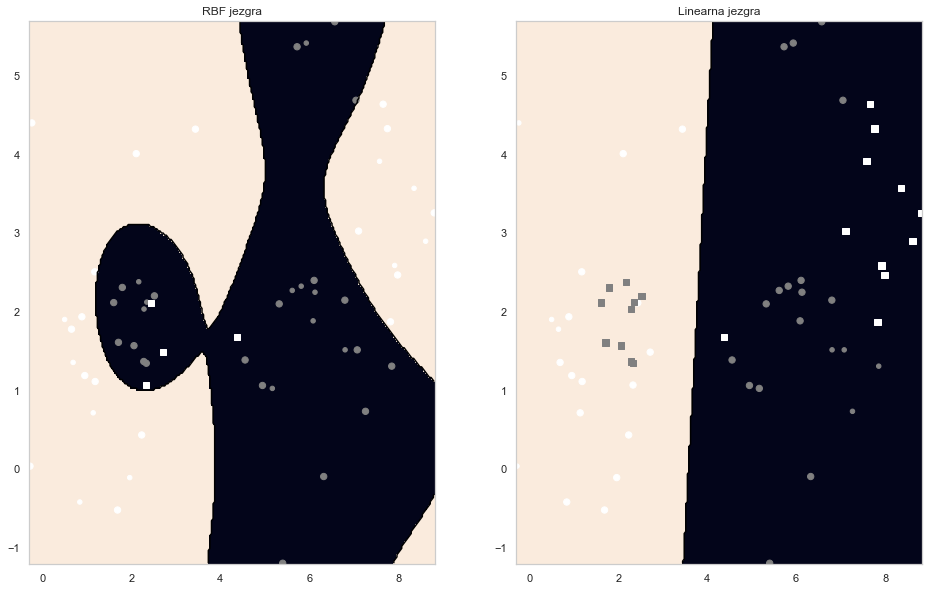

In [22]:
# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X, Y_ = data.sample_gmm_2d(6, 2, 10)

# definiraj model:
model1 = ksvm_wrap.KSVMWrap(X, Y_, 1, "auto", "rbf")
model2 = ksvm_wrap.KSVMWrap(X, Y_, 1, "auto", "linear")


predictions1 = model1.predict(X)
predictions2 = model2.predict(X)
support_v1 = model1.support()
support_v2 = model2.support()

# ispiši performansu (preciznost i odziv po razredima)
accuracy, precision, M = data.eval_perf_multi(predictions1, Y_)
#avg_precision = data.eval_AP(Y_[probs.argsort()])
avg_precision = 0
print("Accuracy: {}, precision: {}, average precision: {}\n".format(accuracy, precision,
                                                                  avg_precision))
# ispiši performansu (preciznost i odziv po razredima)
accuracy, precision, M = data.eval_perf_multi(predictions2, Y_)
#avg_precision = data.eval_AP(Y_[probs.argsort()])
avg_precision = 0
print("Accuracy: {}, precision: {}, average precision: {}\n".format(accuracy, precision,
                                                                  avg_precision))

# iscrtaj rezultate, decizijsku plohu
figure = plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
bbox = (np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(model1.predict, bbox, offset=0.5)
data.graph_data(X, Y_, predictions1, special=support_v1)
plt.title("RBF jezgra")

plt.subplot(1, 2, 2)
bbox = (np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(model2.predict, bbox, offset=0.5)
data.graph_data(X, Y_, predictions2, special=support_v2)
plt.title("Linearna jezgra")

plt.show()

In [3]:
x, Y_ = data.sample_gmm_2d(50, 2, 100)
Yoh = data.class_to_onehot(Y_)
X = torch.Tensor(x).to(device)
Yoh_ = torch.Tensor(Yoh).to(device)

model1 = pt_deep.PTDeep([2, 128, 256, 64,2], torch.relu)
model2 = ksvm_wrap.KSVMWrap(x, Y_, 1, "auto", "linear")

model1.to(device)

pt_deep.train(model1, X, Yoh_, 8000, 0.5, 1e-3, 500)

Y1 = np.argmax(pt_deep.eval(model1, x), axis=1)
Y2 = model2.predict(x)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, precision, M = data.eval_perf_multi(Y1, Y_)
#avg_precision = data.eval_AP(Y_[probs.argsort()])
avg_precision = 0
print("Accuracy: {}, precision: {}, average precision: {}".format(accuracy, precision,
                                                                  avg_precision))

# ispiši performansu (preciznost i odziv po razredima)
accuracy, precision, M = data.eval_perf_multi(Y2, Y_)
#avg_precision = data.eval_AP(Y_[probs.argsort()])
avg_precision = 0
print("Accuracy: {}, precision: {}, average precision: {}".format(accuracy, precision,
                                                                  avg_precision))

Epoch 0/8000, loss = 0.6984587907791138
Epoch 500/8000, loss = 0.6020812392234802
Epoch 1000/8000, loss = 0.5875201225280762
Epoch 1500/8000, loss = 0.5856409668922424
Epoch 2000/8000, loss = 0.5568692684173584
Epoch 2500/8000, loss = 0.5690920948982239
Epoch 3000/8000, loss = 0.5543297529220581
Epoch 3500/8000, loss = 0.5478615760803223
Epoch 4000/8000, loss = 0.5393434762954712
Epoch 4500/8000, loss = 0.5367618203163147
Epoch 5000/8000, loss = 0.5486841201782227
Epoch 5500/8000, loss = 0.55315101146698
Epoch 6000/8000, loss = 0.5383979678153992
Epoch 6500/8000, loss = 0.5285549759864807
Epoch 7000/8000, loss = 0.55267333984375
Epoch 7500/8000, loss = 0.5637401342391968
Accuracy: 0.7518, precision: [(0.8128571428571428, 0.760441029067825), (0.6740909090909091, 0.7389138016940707)], average precision: 0
Accuracy: 0.641, precision: [(0.7914285714285715, 0.6466297052815874), (0.4495454545454545, 0.6287349014621741)], average precision: 0


## 7. Studija slučaja: MNIST (20% bodova)
---
MNIST je skup podataka koji se sastoji od rukom pisanih znamenki. Ispitano je ponašanje različitih arhitektura mreže te utjecaj hiperparametara.

In [ ]:
# TODO napisati kod i dovrsiti ovo sve 